In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
colors = ['r', 'y', 'g', 'b']

(200, 2) (200, 1)


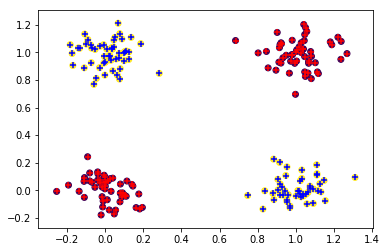

In [3]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])  # XOR
# yyy = np.array([[F],[F],[F],[T]]) # AND

x = []
y = []
n_data = 200
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.normal(loc=0., scale=0.1, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

In [4]:
import mylibrary.nnlib as tnn

In [25]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

In [26]:
optimizer = tnn.Adam(learning_rate=0.01)
logisti11 = tnn.NonLinearLayer(2, 1,activation=tnn.LeakyRelu(), optimizer=optimizer)
logisti12 = tnn.NonLinearLayer(1, 1,activation=tnn.Sigmoid(), optimizer=optimizer)
logistic1 = tnn.AutoForm()
logistic1.collect_global_layers()

In [27]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = logistic1.forward(x)
    loss = tnn.CrossEntropyBinary.loss(a1, y)
    dy = tnn.CrossEntropyBinary.del_loss(a1, y)
    print(a1[:5], y[:5])
    dx = logistic1.backward(dy)
    
    logistic1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        out = (a1>0.5).astype(int)#2 - 1.

        ax.clear()
#         plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
#         plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))
        
        classxy = logistic1.forward(xxyy)
        classxyi = (classxy > 0.5).astype(int)
        plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   alpha=0.5,
                   aspect='auto', origin='lower')
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')        

        fig.canvas.draw()
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

[[0.47952464]
 [0.50043894]
 [0.46128662]
 [0.18053166]
 [0.18486702]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
_______________________
epoch 0
Loss 0.7951859562865021


[[0.48611144]
 [0.50296597]
 [0.47014917]
 [0.18967024]
 [0.19260392]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.49263555]
 [0.50548983]
 [0.47892406]
 [0.19905205]
 [0.20050604]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.49909699]
 [0.50800834]
 [0.48760146]
 [0.20866243]
 [0.20856702]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.50548513]
 [0.51051879]
 [0.49616154]
 [0.21847728]
 [0.21677194]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.51177575]
 [0.5130181 ]
 [0.50455325]
 [0.22844662]
 [0.22509652]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.51494032]
 [0.51550309]
 [0.51276852]
 [0.23854684]
 [0.23353354]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.51742016]
 [0.51797017]
 [0.51738676]
 [0.24867998]
 [0.24205231]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.51987825]
 [0.52041587]
 [0.51986159]
 [0.25877172]
 [0.25063111]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.5223109 ]
 [0.522836



[[0.53799543]
 [0.53854194]
 [0.53666237]
 [0.34996382]
 [0.49717766]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.53836647]
 [0.53892063]
 [0.53701905]
 [0.34821667]
 [0.49686672]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.53880678]
 [0.53936851]
 [0.53744524]
 [0.34665823]
 [0.49673704]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.53931131]
 [0.53988054]
 [0.53793562]
 [0.34523089]
 [0.49675714]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.53987502]
 [0.54045169]
 [0.53848516]
 [0.3439305 ]
 [0.49692193]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.54049232]
 [0.54107642]
 [0.53908817]
 [0.34269471]
 [0.49717442]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.54115768]
 [0.54174924]
 [0.53973888]
 [0.34146852]
 [0.49748274]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.54186621]
 [0.54246525]
 [0.54043244]
 [0.34025482]
 [0.49784648]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.54261326]
 [0.5432198 ]
 [0.54116422]
 [0.33905603]
 [0.49826505]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.54339436]
 [0.54400841]
 [0.54192977]
 [0.33787419]
 [0.49873771]] [[0.]
 [0



[[0.60065668]
 [0.60186459]
 [0.59783027]
 [0.23418659]
 [0.53605055]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.60134977]
 [0.60256531]
 [0.59850521]
 [0.23318474]
 [0.53697279]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.60203671]
 [0.60325981]
 [0.59917393]
 [0.23220484]
 [0.53793524]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.60271593]
 [0.6039465 ]
 [0.59983487]
 [0.23125107]
 [0.53894049]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.60338529]
 [0.60462341]
 [0.60048569]
 [0.23021484]
 [0.53985944]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.60404397]
 [0.60528967]
 [0.6011256 ]
 [0.22911186]
 [0.54070743]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.60469157]
 [0.60594489]
 [0.60175426]
 [0.22795793]
 [0.54150009]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.60532762]
 [0.60658862]
 [0.60237095]
 [0.22671533]
 [0.54221337]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.60595217]
 [0.60722092]
 [0.60297548]
 [0.22535264]
 [0.54283209]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.60656619]
 [0.60784273]
 [0.60356892]
 [0.22389699]
 [0.5433802 ]] [[0.]
 [0



[[0.63619487]
 [0.63792258]
 [0.63207414]
 [0.15755406]
 [0.58239064]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.63644324]
 [0.63817599]
 [0.63231425]
 [0.15723811]
 [0.58288815]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.63668037]
 [0.63841815]
 [0.63254323]
 [0.15694393]
 [0.58340616]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.63690567]
 [0.63864845]
 [0.63276046]
 [0.15666869]
 [0.5839419 ]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.63711857]
 [0.63886634]
 [0.63296536]
 [0.15640948]
 [0.58449247]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.63731861]
 [0.63907135]
 [0.63315743]
 [0.15616346]
 [0.58505491]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.63750538]
 [0.6392631 ]
 [0.63333626]
 [0.15592782]
 [0.58562626]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.63767857]
 [0.63944126]
 [0.6335015 ]
 [0.15569991]
 [0.58620369]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.63783796]
 [0.63960563]
 [0.63365293]
 [0.15547721]
 [0.58678453]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.63798341]
 [0.63975608]
 [0.63379038]
 [0.15525741]
 [0.58736629]] [[0.]
 [0



[[0.64403375]
 [0.64615077]
 [0.63907781]
 [0.12240569]
 [0.61390405]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.64409606]
 [0.64621794]
 [0.63912944]
 [0.12180773]
 [0.61385647]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.64416857]
 [0.64629504]
 [0.63919137]
 [0.12130225]
 [0.61401232]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.64425093]
 [0.64638175]
 [0.63926326]
 [0.12088579]
 [0.61436237]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.64434173]
 [0.64647685]
 [0.63934369]
 [0.12047076]
 [0.6147054 ]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.64443955]
 [0.64657903]
 [0.63943061]
 [0.11998694]
 [0.61496311]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.6445441 ]
 [0.64668799]
 [0.63952381]
 [0.11944714]
 [0.61515272]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.64465528]
 [0.64680359]
 [0.63962326]
 [0.11886396]
 [0.61529153]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.64477389]
 [0.64692652]
 [0.63973051]
 [0.11832388]
 [0.61548345]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.64489965]
 [0.64705649]
 [0.6398453 ]
 [0.11782919]
 [0.61573436]] [[0.]
 [0



[[0.65130317]
 [0.65369977]
 [0.64561152]
 [0.09762502]
 [0.64209569]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65136468]
 [0.65376461]
 [0.64566464]
 [0.09724129]
 [0.64214462]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65142467]
 [0.65382793]
 [0.64571596]
 [0.09684201]
 [0.64219219]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65148384]
 [0.65389044]
 [0.64576625]
 [0.0964338 ]
 [0.64223916]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65154288]
 [0.65395278]
 [0.64581626]
 [0.09602272]
 [0.64228624]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.6516024 ]
 [0.65401558]
 [0.64586665]
 [0.09561426]
 [0.6423341 ]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65166298]
 [0.65407937]
 [0.64591803]
 [0.0952133 ]
 [0.64238332]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65172506]
 [0.65414462]
 [0.64597091]
 [0.09482405]
 [0.64243441]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65178903]
 [0.65421169]
 [0.6460257 ]
 [0.0944501 ]
 [0.64248774]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65185615]
 [0.6542817 ]
 [0.64608452]
 [0.09417202]
 [0.64254472]] [[0.]
 [0



[[0.65396745]
 [0.65657053]
 [0.64770089]
 [0.08401002]
 [0.64402226]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65402671]
 [0.65663192]
 [0.6477563 ]
 [0.08399063]
 [0.64407228]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65408619]
 [0.65669333]
 [0.64781205]
 [0.08402765]
 [0.64412348]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65414383]
 [0.65675307]
 [0.64786601]
 [0.08401858]
 [0.6441719 ]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65419904]
 [0.65681052]
 [0.64791755]
 [0.0839667 ]
 [0.644217  ]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65425144]
 [0.65686531]
 [0.6479663 ]
 [0.08387568]
 [0.64425849]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65430086]
 [0.65691724]
 [0.64801208]
 [0.08374949]
 [0.64429627]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65434731]
 [0.65696632]
 [0.6480549 ]
 [0.08359234]
 [0.64433043]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65439093]
 [0.65701266]
 [0.6480949 ]
 [0.0834085 ]
 [0.64436118]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65443197]
 [0.6570565 ]
 [0.64813233]
 [0.08320232]
 [0.64438885]] [[0.]
 [0



[[0.65540884]
 [0.65821291]
 [0.64890103]
 [0.07586997]
 [0.64449363]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65542103]
 [0.65822756]
 [0.64891037]
 [0.07577425]
 [0.64449381]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.6554336 ]
 [0.65824258]
 [0.64892012]
 [0.0756821 ]
 [0.64449447]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65544649]
 [0.65825791]
 [0.64893019]
 [0.07559351]
 [0.64449553]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65545963]
 [0.65827347]
 [0.64894052]
 [0.07550838]
 [0.64449691]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65547157]
 [0.65828801]
 [0.64894845]
 [0.07533314]
 [0.6444969 ]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65548404]
 [0.65830289]
 [0.64895594]
 [0.0751812 ]
 [0.64449944]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65549727]
 [0.65831833]
 [0.64896331]
 [0.07505177]
 [0.64450455]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65551012]
 [0.65833358]
 [0.64896943]
 [0.07484154]
 [0.64450881]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.6555231 ]
 [0.65834913]
 [0.64897496]
 [0.07456147]
 [0.64451282]] [[0.]
 [0



[[0.65788851]
 [0.66085235]
 [0.65101011]
 [0.06472799]
 [0.64634033]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65791577]
 [0.66088091]
 [0.65103272]
 [0.06466163]
 [0.64636367]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65794159]
 [0.66090835]
 [0.65105366]
 [0.06451474]
 [0.64638397]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65796772]
 [0.66093596]
 [0.65107483]
 [0.06439763]
 [0.64640546]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65799435]
 [0.6609641 ]
 [0.65109768]
 [0.06430031]
 [0.64642626]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65802139]
 [0.6609927 ]
 [0.65112201]
 [0.0642217 ]
 [0.6464464 ]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65804706]
 [0.6610202 ]
 [0.65114457]
 [0.06406827]
 [0.64646392]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.6580747 ]
 [0.66104925]
 [0.65117028]
 [0.06404189]
 [0.64648494]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65810075]
 [0.66107698]
 [0.65119393]
 [0.06393687]
 [0.6465031 ]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65812679]
 [0.66110454]
 [0.6512173 ]
 [0.06386265]
 [0.64652247]] [[0.]
 [0



[[0.6594258 ]
 [0.66249464]
 [0.65231909]
 [0.05844198]
 [0.64744891]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65943454]
 [0.6625048 ]
 [0.65232588]
 [0.05832427]
 [0.64745096]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65944486]
 [0.66251615]
 [0.65233442]
 [0.05829088]
 [0.64745669]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65945654]
 [0.66252851]
 [0.65234448]
 [0.05833356]
 [0.64746568]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65946748]
 [0.66254029]
 [0.65235377]
 [0.05834173]
 [0.64747303]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65947752]
 [0.66255132]
 [0.65236213]
 [0.05831834]
 [0.64747868]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65948667]
 [0.66256159]
 [0.65236956]
 [0.05826651]
 [0.6474827 ]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65949502]
 [0.66257118]
 [0.65237618]
 [0.05818949]
 [0.64748527]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.6595028 ]
 [0.66258029]
 [0.6523822 ]
 [0.05809059]
 [0.64748669]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65951028]
 [0.66258919]
 [0.65238792]
 [0.05797311]
 [0.64748731]] [[0.]
 [0



[[0.65990225]
 [0.6630543 ]
 [0.65269252]
 [0.05555143]
 [0.64752454]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65990629]
 [0.66305923]
 [0.65269546]
 [0.05554203]
 [0.64752431]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.6599128 ]
 [0.66306618]
 [0.65270106]
 [0.05562608]
 [0.64752901]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65991929]
 [0.66307322]
 [0.6527066 ]
 [0.05568517]
 [0.64753304]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65992538]
 [0.66307997]
 [0.6527117 ]
 [0.05572054]
 [0.64753604]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65993081]
 [0.66308617]
 [0.65271609]
 [0.05573365]
 [0.64753781]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65993546]
 [0.6630917 ]
 [0.65271965]
 [0.05572618]
 [0.64753828]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65993933]
 [0.66309653]
 [0.65272237]
 [0.05569996]
 [0.64753748]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65994248]
 [0.66310072]
 [0.65272434]
 [0.05565695]
 [0.64753554]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.65994508]
 [0.66310443]
 [0.65272571]
 [0.05559917]
 [0.64753266]] [[0.]
 [0



[[0.6602826 ]
 [0.66350851]
 [0.65298809]
 [0.05346253]
 [0.64754366]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66028103]
 [0.66350802]
 [0.65298538]
 [0.05340059]
 [0.64753677]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66028012]
 [0.66350818]
 [0.65298334]
 [0.05333816]
 [0.64753053]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66028003]
 [0.66350915]
 [0.65298214]
 [0.05327598]
 [0.64752511]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.6602809 ]
 [0.66351109]
 [0.65298194]
 [0.05321473]
 [0.64752069]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66028286]
 [0.6635141 ]
 [0.65298285]
 [0.05315499]
 [0.6475174 ]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66028794]
 [0.66351964]
 [0.65298712]
 [0.05321104]
 [0.64752042]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66029349]
 [0.66352571]
 [0.65299186]
 [0.05325648]
 [0.64752361]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66029912]
 [0.66353191]
 [0.65299667]
 [0.05329133]
 [0.64752662]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66030454]
 [0.66353794]
 [0.65300123]
 [0.05331581]
 [0.64752913]] [[0.]
 [0



[[0.66058404]
 [0.66387498]
 [0.65320413]
 [0.05171599]
 [0.64753536]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66058777]
 [0.66387942]
 [0.6532069 ]
 [0.05170681]
 [0.64753574]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.6605906 ]
 [0.66388297]
 [0.65320875]
 [0.05169734]
 [0.64753521]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66059257]
 [0.66388565]
 [0.65320973]
 [0.05168753]
 [0.64753381]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66059374]
 [0.66388753]
 [0.65320989]
 [0.05167732]
 [0.64753161]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66059415]
 [0.66388867]
 [0.65320927]
 [0.05166666]
 [0.64752865]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.6605939 ]
 [0.66388914]
 [0.65320797]
 [0.05165553]
 [0.64752501]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66059304]
 [0.66388902]
 [0.65320605]
 [0.05164393]
 [0.64752076]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66059167]
 [0.66388838]
 [0.6532036 ]
 [0.05163186]
 [0.647516  ]] [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
[[0.66058987]
 [0.66388732]
 [0.6532007 ]
 [0.05161933]
 [0.64751081]] [[0.]
 [0

TclError: invalid command name "pyimage76"

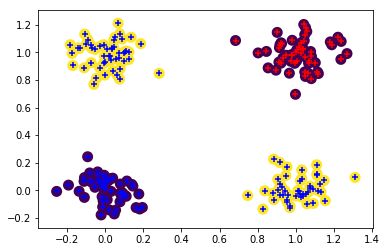

In [28]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

In [29]:
classxyi = (logistic1.forward(xxyy) > 0.5).astype(int)
classxy = logistic1.forward(xxyy)

In [30]:
a1.shape, classxy.shape

((200, 1), (21980, 1))

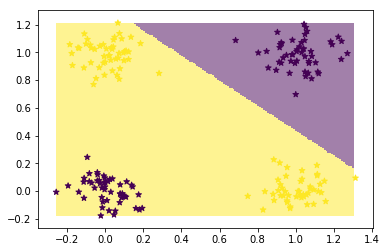

In [31]:
# advanced way of showing
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=matplotlib.colors.ListedColormap(colors[2:]),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

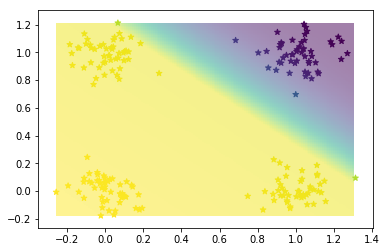

In [32]:
# advanced way of showing
plt.imshow(classxy.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.5,
           aspect='auto', origin='lower')

# plt.scatter(centers[:,0], centers[:, 1], marker='o', c=color_list,lw=5)
# plt.scatter(datax, datay, marker = '.', c=belongto, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,0], x[:, 1], c=a1.reshape(-1), marker='*')

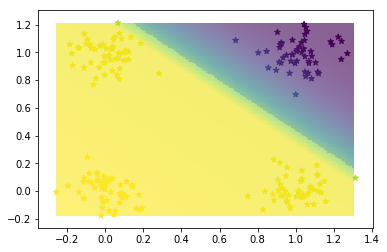

In [33]:
# advanced way of showing
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.25,
           aspect='auto', origin='lower')
plt.imshow(classxy.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=a1.reshape(-1)- np.min(dy), marker='*')

### gradient predicting

In [34]:
dy.min(), dy.max()

(-0.41356456337643954, 0.6657219096613484)

In [35]:
minm = dy.min()
diff = dy.max() - dy.min()
scaled = (dy - minm)/diff
scaled.min(), scaled.max()

(0.0, 1.0)

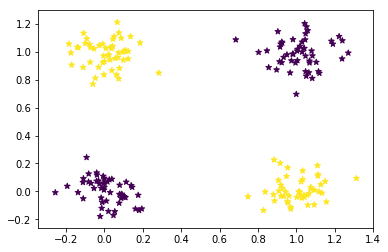

In [36]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

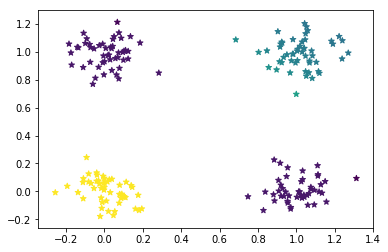

In [37]:
plt.scatter(x[:,0], x[:, 1], c=scaled.reshape(-1), marker='*')

In [38]:
dys = {0:(dy, scaled, minm, diff)}
a1s = {0:a1}
outs = {0:out}

In [39]:
optimizer = tnn.Adam()
logisti21 = tnn.NonLinearLayer(2, 1,activation=tnn.LeakyRelu(), optimizer=optimizer)
logisti22 = tnn.NonLinearLayer(1, 1,activation=tnn.Sigmoid(), optimizer=optimizer)
logistic2 = tnn.AutoForm()
logistic2.collect_global_layers()

In [40]:
logistic2.get_layers()

In [41]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = logistic2.forward(x)
    loss = tnn.CrossEntropyBinary.loss(a1, dys[0][1])
    dy = tnn.CrossEntropyBinary.del_loss(a1, dys[0][1])
    
    dx = logistic2.backward(dy)
    
    logistic2.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
#         out = ((a1s[0] - (a1*diff + minm)) > 0.5).astype(int)

        ax.clear()
#         plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
#         plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))
        
        classxy = logistic1.forward(xxyy) - (logistic2.forward(xxyy)*diff+minm)
        classxyi = (classxy > 0.5).astype(int)
        plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   alpha=0.5,
                   aspect='auto', origin='lower')
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')      
        
#         plt.scatter(x, y, marker='.', c='g', label='x,y')
#         plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
#         plt.scatter(x, dy.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
#         plt.plot(x, np.zeros_like(x), c='b', lw=1)
#         plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.7522750968922693


_______________________
epoch 10
Loss 0.7123078117635245


_______________________
epoch 20
Loss 0.6862148528008154


_______________________
epoch 30
Loss 0.6741666301341589


_______________________
epoch 40
Loss 0.6709005621135072


_______________________
epoch 50
Loss 0.6698045864423324


_______________________
epoch 60
Loss 0.6694537924704437


_______________________
epoch 70
Loss 0.6693656022028504


_______________________
epoch 80
Loss 0.6693339601819475


_______________________
epoch 90
Loss 0.6693032611541558


_______________________
epoch 100
Loss 0.6692684641108113


_______________________
epoch 110
Loss 0.6692306879253149


_______________________
epoch 120
Loss 0.6691905828576858


_______________________
epoch 130
Loss 0.6691483124212558


_______________________
epoch 140
Loss 0.669089417177086


_______________________
epoch 150
Loss 0.6689748046659092


_______________________
epoch 160
Loss 0.66881884842



_______________________
epoch 1360
Loss 0.37418215843571945


_______________________
epoch 1370
Loss 0.37417368192040956


_______________________
epoch 1380
Loss 0.3741717154228348


_______________________
epoch 1390
Loss 0.37416286231650686


_______________________
epoch 1400
Loss 0.3741565602694232


_______________________
epoch 1410
Loss 0.3741511085719914


_______________________
epoch 1420
Loss 0.3741483538832561


_______________________
epoch 1430
Loss 0.37413921289124774


_______________________
epoch 1440
Loss 0.3741391107645747


_______________________
epoch 1450
Loss 0.3741359550804302


_______________________
epoch 1460
Loss 0.37413190113681155


_______________________
epoch 1470
Loss 0.3741259952934594


_______________________
epoch 1480
Loss 0.3741257634605557


_______________________
epoch 1490
Loss 0.3741218265090649


_______________________
epoch 1500
Loss 0.37411884933696016


_______________________
epoch 1510
Loss 0.37411212843915026


_______________

TclError: invalid command name "pyimage96"

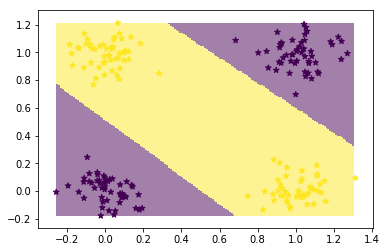

In [42]:
%matplotlib inline
classxy = logistic1.forward(xxyy) - (logistic2.forward(xxyy)*diff+minm)
classxyi = (classxy > 0.5).astype(int)
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')      
